In [22]:
# script to calculate ratios for use in TTS method 
# match rf 11 to varying BL for ratios 
# 1) RF11 UT to RF11 BL 
# 2) RF11 UT to campaign average BL 
# 3) RF11 UT to RF11, 10, 09 BL 
# author: sofia chelpon
# date created: 3-28-2020
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? 
Nothing done.


In [2]:
import numpy as np 
import xarray as xr
import pandas as pd 
import datetime 
import seaborn as sns
import datetime as dt
from scipy.optimize import least_squares

import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
from mpl_toolkits import mplot3d

%matplotlib inline
%config inlinebackend.figure_format='retina'

In [3]:
# load in both toga and awas data pickles 
awas_df = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_ratios/awas_data_df.pkl")
toga_df = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_ratios/toga_data_df.pkl")

In [4]:
################# -------------------- TOGA  -------------------- #################

In [5]:
# get mean in UT and BL for 1) flights in total and 2) individual flights 
toga_means = pd.DataFrame()

# rf11 - UT 
toga_means['UT - RF11'] = toga_df.loc[(toga_df['GGALT'] > 12000) 
                                      & (toga_df['GGALT'] < 14000)
                                      & (toga_df['GGLAT'] < 12) 
                                      & (toga_df['GGLON'] < 145)
                                      & (toga_df['Flight'] == 'RF11')].mean()

# rf11 updraft region - BL 
toga_means['BL - RF11 Region'] = toga_df.loc[(toga_df['GGALT'] < 2000) 
                                      & (toga_df['GGLAT'] < 12) 
                                      & (toga_df['GGLON'] < 145)].mean()

# campaign average - BL 
toga_means['BL - All RF'] = toga_df.loc[(toga_df['GGALT'] < 2000)].mean()


#toga_means.index.name = "Trace_Gas"
toga_means = toga_means.drop('GGALT').drop('GGLAT').drop('GGLON')
toga_means = toga_means.reset_index()
toga_means = toga_means.rename(columns={'index': 'Trace_Gas'})

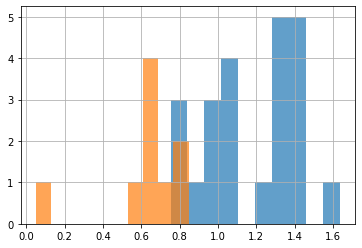

In [25]:
region = toga_df.loc[(toga_df['GGALT'] < 2000) 
                                      & (toga_df['GGLAT'] < 12) 
                                      & (toga_df['GGLON'] < 145)]
region04 = region[region['Flight'] == 'RF04']
region11 = region[region['Flight'] == 'RF11']

region04['Bromoform'].hist(alpha = 0.7, label = 'RF04')
region11['Bromoform'].hist(alpha = 0.7, label = 'RF11')


In [7]:
# ratios for 1) flights in total and 2) individual flights 
toga_ratios = pd.DataFrame()

toga_ratios['Trace_Gas'] = toga_means['Trace_Gas']
toga_ratios['RF11_CampAvg'] = toga_means['UT - RF11']/toga_means['BL - All RF']
toga_ratios['RF11_Region'] = toga_means['UT - RF11']/toga_means['BL - RF11 Region']
toga_ratios

# drop species names so doesnt duplicate column when merged 
toga_ratios = toga_ratios.drop('Trace_Gas', axis = 1)

In [8]:
### add attribute to each species (BL, tropo, and UT lifetimes)
# read in from xls file to make dataframe
mypath2 = '/Volumes/scdrive2/TTS_2020/contrast_readin/toga_lodhalf/toga_lifetimes_12162019.xlsx'
toga_lifetimes = pd.read_excel(mypath2)

# merge lifetimes to ratios
toga_ratios_full = toga_lifetimes.merge(toga_ratios, left_index=True, right_index=True)
toga_ratios_full.insert(0, 'Instrument', 'TOGA')

In [9]:
toga_ratios_full

,Instrument,Trace_Gas,BL_tau,TROPO_tau,UT_tau,RF11_CampAvg,RF11_Region
0,TOGA,Acetaldehyde,0.289063,0.365920,0.376967,0.341840,0.272966
1,TOGA,n_Butane,1.959376,3.813463,8.057685,0.122098,0.183928
2,TOGA,i_Butane,2.175570,4.031311,7.903592,0.195819,0.237671
3,TOGA,Benzene,3.755136,6.447323,11.947207,0.515576,0.393701
4,TOGA,C3H8,4.214557,9.062693,22.450000,0.372888,0.353284
5,TOGA,Methanol,5.160001,9.567463,20.040000,0.529470,0.451424
6,TOGA,Bromoform,15.069605,23.166062,33.432173,0.654756,0.611974
7,TOGA,Tetrachloroethylene,27.471720,77.860538,317.837040,0.709361,0.692846
8,TOGA,Dibromomethane,39.129546,95.533111,306.353687,0.944656,0.931413
9,TOGA,Dichloromethane,45.867749,109.800998,343.676023,0.872619,0.681654


In [10]:
################# -------------------- AWAS  -------------------- #################

In [11]:
# get mean in UT and BL for 1) flights in total and 2) individual flights 
awas_means = pd.DataFrame()

# rf11 - UT 
awas_means['UT - RF11'] = awas_df.loc[(toga_df['GGALT'] > 12000) & 
                                      (awas_df['GGALT'] < 14000) &
                                      (awas_df['Flight'] == 'RF11')].mean()

# rf11 updraft region - BL 
awas_means['BL - RF11 Region'] = awas_df.loc[(toga_df['GGALT'] < 2000) 
                                      & (awas_df['GGLAT'] < 12) 
                                      & (awas_df['GGLON'] < 145)].mean()

# campaign average - BL 
awas_means['BL - All RF'] = awas_df.loc[(awas_df['GGALT'] < 2000)].mean()

#toga_means.index.name = "Trace_Gas"
awas_means = awas_means.drop('GGALT').drop('GGLAT').drop('GGLON')
awas_means = awas_means.reset_index()
awas_means = awas_means.rename(columns={'index': 'Trace_Gas'})

In [12]:
# ratios for 1) flights in total and 2) individual flights 
awas_ratios = pd.DataFrame()

awas_ratios['Trace_Gas'] = awas_means['Trace_Gas']
awas_ratios['RF11_CampAvg'] = awas_means['UT - RF11']/awas_means['BL - All RF']
awas_ratios['RF11_Region'] = awas_means['UT - RF11']/awas_means['BL - RF11 Region']

# drop species names so doesnt duplicate column when merged 
awas_ratios = awas_ratios.drop('Trace_Gas', axis = 1)

In [13]:
### add attribute to each species (BL, tropo, and UT lifetimes)
# read in from xls file to make dataframe
mypath2 = '/Volumes/scdrive2/TTS_2020/contrast_readin/awas/awas_lifetimes_12162019.xlsx'
awas_lifetimes = pd.read_excel(mypath2)
len(awas_lifetimes)

# merge lifetimes to ratios 
awas_ratios_full = awas_lifetimes.merge(awas_ratios, left_index=True, right_index=True)
awas_ratios_full.insert(0, 'Instrument', 'AWAS')

In [14]:
awas_ratios_full

,Instrument,Trace_Gas,BL_tau,TROPO_tau,UT_tau,RF11_CampAvg,RF11_Region
0,AWAS,C2H6_Ethane,18.555721,48.949092,167.260709,0.638492,1.034435
1,AWAS,C2H2_Ethyne,5.422335,9.603369,18.712675,0.626241,1.076144
2,AWAS,C3H8_Propane,4.214557,9.062693,22.450000,0.217952,0.939052
3,AWAS,C4H10_Isobutane,2.175570,4.031311,7.903592,0.120980,0.944104
4,AWAS,C4H10_nButane,1.959376,3.813463,8.057685,0.111386,0.789474
5,AWAS,C5H12_nPentane,1.214449,2.312606,4.723079,0.074720,0.972222
6,AWAS,C6H6_Benzene,3.755136,6.447323,11.947207,0.675202,1.553560
7,AWAS,OCS_Carbonyl_sulfide,2000.000000,2000.000000,2000.000000,0.984468,0.993492
8,AWAS,C2H6S_Dimethyl_sulfide,0.955122,1.689426,3.279163,0.221208,10.363247
9,AWAS,CCl2F2_CFC_12,37000.000000,37000.000000,37000.000000,1.007016,1.003556


In [15]:
################# -------------------- MERGE THE TWO  -------------------- #################

In [16]:
master_list = awas_ratios_full
master_list = master_list.append(toga_ratios_full, ignore_index = True, sort = False)

# pickle this!! 
master_list.to_pickle("./contrast_ratios_rf11_regional.pkl")

# look at output 
#master_list[master_list['Trace_Gas'] == 'Dichloromethane'].drop('BL_tau', axis = 1).drop('UT_tau', axis = 1)

In [17]:
master_list

,Instrument,Trace_Gas,BL_tau,TROPO_tau,UT_tau,RF11_CampAvg,RF11_Region
0,AWAS,C2H6_Ethane,18.555721,48.949092,167.260709,0.638492,1.034435
1,AWAS,C2H2_Ethyne,5.422335,9.603369,18.712675,0.626241,1.076144
2,AWAS,C3H8_Propane,4.214557,9.062693,22.450000,0.217952,0.939052
3,AWAS,C4H10_Isobutane,2.175570,4.031311,7.903592,0.120980,0.944104
4,AWAS,C4H10_nButane,1.959376,3.813463,8.057685,0.111386,0.789474
5,AWAS,C5H12_nPentane,1.214449,2.312606,4.723079,0.074720,0.972222
6,AWAS,C6H6_Benzene,3.755136,6.447323,11.947207,0.675202,1.553560
7,AWAS,OCS_Carbonyl_sulfide,2000.000000,2000.000000,2000.000000,0.984468,0.993492
8,AWAS,C2H6S_Dimethyl_sulfide,0.955122,1.689426,3.279163,0.221208,10.363247
9,AWAS,CCl2F2_CFC_12,37000.000000,37000.000000,37000.000000,1.007016,1.003556
